## Задание 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [4]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

X_train_scaled.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.50032,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.50032,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474


In [8]:
from sklearn.manifold import TSNE

In [9]:
dim_reducer = TSNE(n_components=2, learning_rate=250, random_state=42)
components = dim_reducer.fit_transform(X_train_scaled)

In [12]:
dims=2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_2d_train = pd.DataFrame(data = components, columns = colnames)
components_2d_train.head()

,component_1,component_2
0,28.138090,18.375324
1,-9.785578,-4.535539
2,-15.695753,-17.543627
3,37.924854,13.517046
4,-8.786393,3.995167


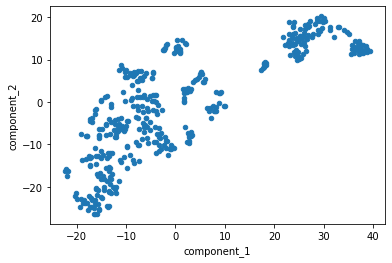

In [13]:
components_2d_train.plot(kind='scatter', x='component_1', y='component_2')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

## Задание 2

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=100)

In [102]:
labels_clast = model.fit_predict(X_train_scaled)
labels_clast_3 = pd.Series(labels_clast, name='clusters_3')

In [103]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

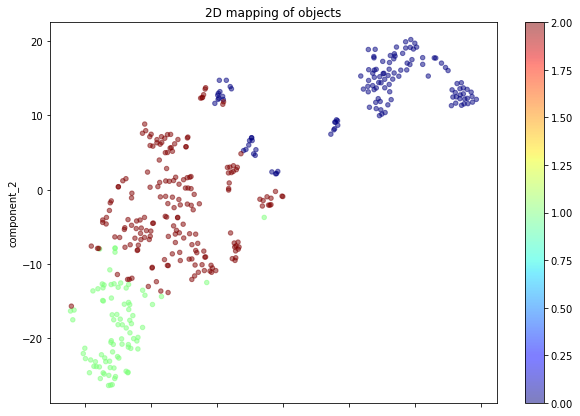

In [104]:
display_components_in_2D_space(components_2d_train, labels_clast_3)

In [107]:
for i in range(3):
    print(f'Claster {i}: {y_train[labels_clast == i].mean()}')

Claster 0: price    16.165354
dtype: float64
Claster 1: price    27.788372
dtype: float64
Claster 2: price    24.958115
dtype: float64


In [109]:
for i in range(3):
    print(f'Claster {i}: {X_train["CRIM"][labels_clast == i].mean()}')

Claster 0: 10.797028425196853
Claster 1: 0.07356558139534886
Claster 2: 0.42166020942408367


## Задание 3

In [111]:
labels_clast_test = model.predict(X_test_scaled)
labels_clast_3_test = pd.Series(labels_clast_test, name='clusters_3')

In [112]:
for i in range(3):
    print(f'Claster {i}: {y_test[labels_clast_test == i].mean()}')

Claster 0: price    16.437143
dtype: float64
Claster 1: price    31.35
dtype: float64
Claster 2: price    21.860784
dtype: float64


In [114]:
for i in range(3):
    print(f'Claster {i}: {X_test["CRIM"][labels_clast_test == i].mean()}')

Claster 0: 10.165531142857143
Claster 1: 0.062060000000000004
Claster 2: 0.26607882352941176


Видим, что на тестовых данных значения средних в разных кластерах несколько отличаются от средних на тренировочных данных в соответствующих кластерах, но незначительно